#### Tarea 4
Evelyn Venegas Agustín // 422068635 // Introudcción a la ciencia de datos

Primero, abrimos el archivo y lo leemos

In [34]:
import pandas as pd
df = pd.read_csv('/content/wdbc.data', header=None)
print(df.head())
print(df.shape)

         0  1      2      3       4       5        6        7       8   \
0    842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        9   ...     22     23      24      25      26      27      28      29  \
0  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       30       31  
0  0.4601  0.11890  
1  0.2750  0.08902  
2  0.

Ahora, usamos describe e info para obtener la información general sobre el conjunto, como los tipos de datos que contiene y tamaño del archivo

In [35]:
print(df.describe())
print(df.info())

                 0           2           3           4            5   \
count  5.690000e+02  569.000000  569.000000  569.000000   569.000000   
mean   3.037183e+07   14.127292   19.289649   91.969033   654.889104   
std    1.250206e+08    3.524049    4.301036   24.298981   351.914129   
min    8.670000e+03    6.981000    9.710000   43.790000   143.500000   
25%    8.692180e+05   11.700000   16.170000   75.170000   420.300000   
50%    9.060240e+05   13.370000   18.840000   86.240000   551.100000   
75%    8.813129e+06   15.780000   21.800000  104.100000   782.700000   
max    9.113205e+08   28.110000   39.280000  188.500000  2501.000000   

               6           7           8           9           10  ...  \
count  569.000000  569.000000  569.000000  569.000000  569.000000  ...   
mean     0.096360    0.104341    0.088799    0.048919    0.181162  ...   
std      0.014064    0.052813    0.079720    0.038803    0.027414  ...   
min      0.052630    0.019380    0.000000    0.000000  

Queremos saber cuantos diagnósticos benignos y cuantos malignos hubo

In [36]:
print(df.columns)
print(df[1].value_counts())

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype='int64')
1
B    357
M    212
Name: count, dtype: int64


Creamos un diccionario para asignar nuevos nombres a las primeras 6 columnas del dataframe

In [37]:
nombres_columnas = {
0: "ID",
1: "diagnostico",
2: "radio medio",
3: "textura media",
4: "perimetro medio",
5: "area media"
}
df.rename(columns=nombres_columnas, inplace=True)
print(df.columns)

Index([             'ID',     'diagnostico',     'radio medio',
         'textura media', 'perimetro medio',      'area media',
                       6,                 7,                 8,
                       9,                10,                11,
                      12,                13,                14,
                      15,                16,                17,
                      18,                19,                20,
                      21,                22,                23,
                      24,                25,                26,
                      27,                28,                29,
                      30,                31],
      dtype='object')


In [38]:
df['target'] = df['diagnostico'].map({'M': 0, 'B': 1})
#lo comenté pq ya borre la columna y si vuelvo a correr me marca error pq no encuentra la columna

eliminamos las columnas con información sensible como el ID y agregamos la columna target, que asignará 0 o 1 según el diagnóstico

In [39]:
df = df.drop(columns=['ID', 'diagnostico'])
print(df.iloc[:10, :4])
print(df['target'])

   radio medio  textura media  perimetro medio  area media
0        17.99          10.38           122.80      1001.0
1        20.57          17.77           132.90      1326.0
2        19.69          21.25           130.00      1203.0
3        11.42          20.38            77.58       386.1
4        20.29          14.34           135.10      1297.0
5        12.45          15.70            82.57       477.1
6        18.25          19.98           119.60      1040.0
7        13.71          20.83            90.20       577.9
8        13.00          21.82            87.50       519.8
9        12.46          24.04            83.97       475.9
0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64


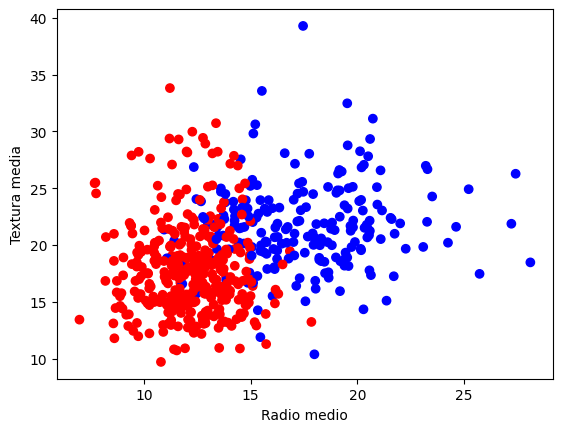

In [40]:
import matplotlib.pyplot as plt
plt.scatter(df['radio medio'], df['textura media'], c=df['target'], cmap='bwr')
plt.xlabel('Radio medio')
plt.ylabel('Textura media')
plt.show()

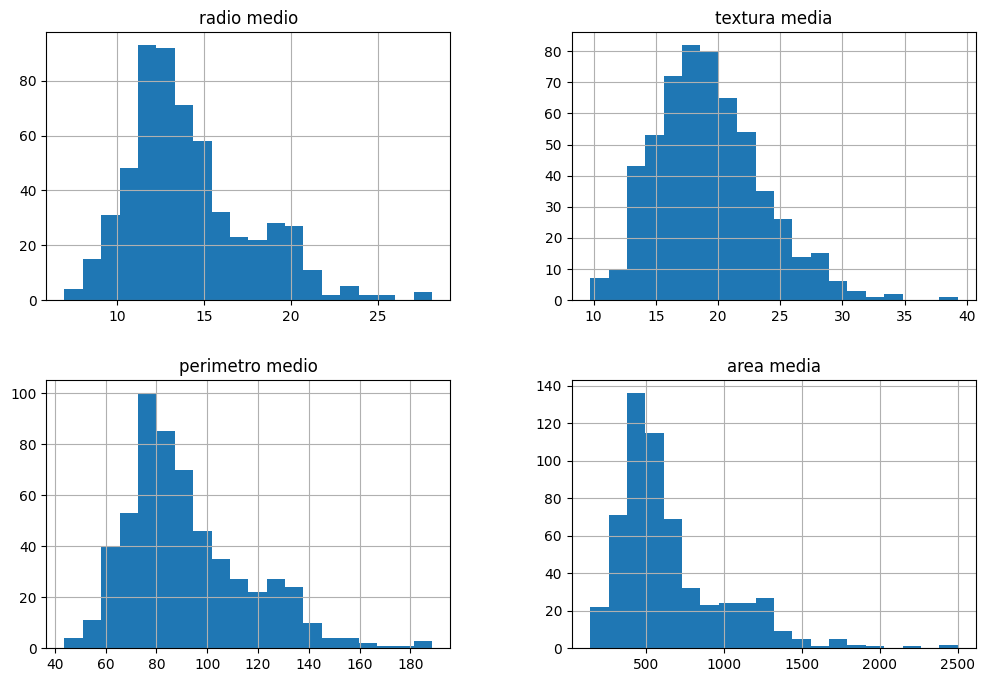

In [41]:
import matplotlib.pyplot as plt
df.iloc[:, :4].hist(figsize=(12, 8), bins=20)
plt.show()

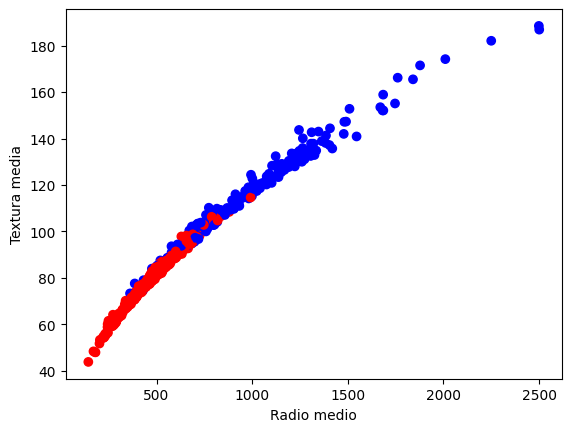

In [42]:
plt.scatter(df['area media'], df['perimetro medio'], c=df['target'], cmap='bwr')
plt.xlabel('Radio medio')
plt.ylabel('Textura media')
plt.show()

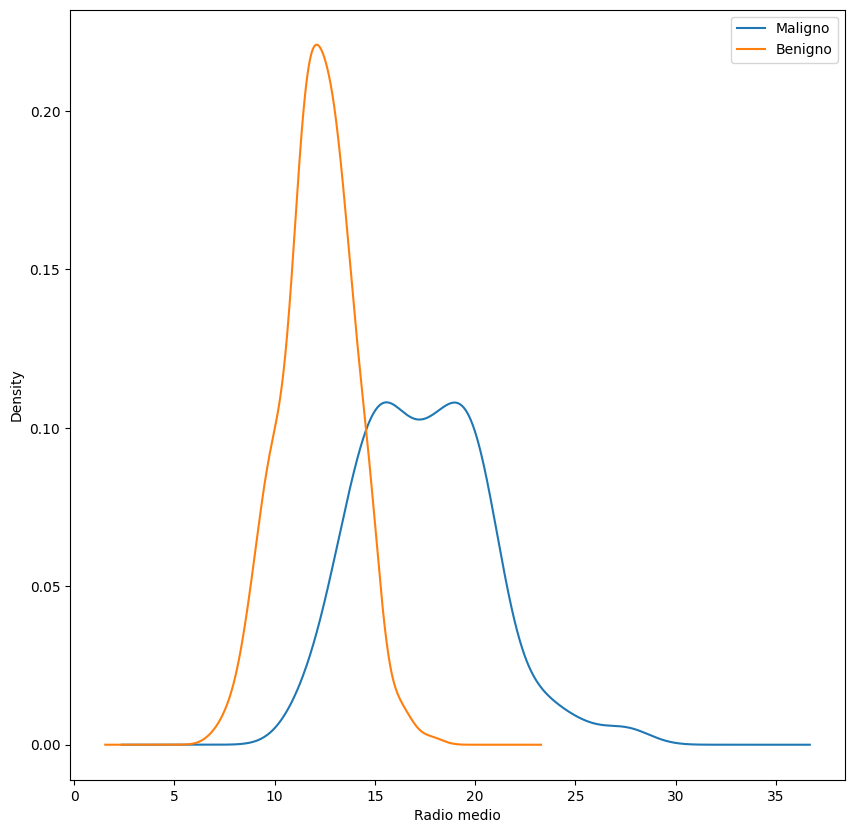

In [43]:
df.groupby("target")["radio medio"].plot(kind='kde', figsize=(10, 10))
plt.legend(['Maligno', 'Benigno'], loc='upper right')
plt.xlabel('Radio medio')
plt.show()

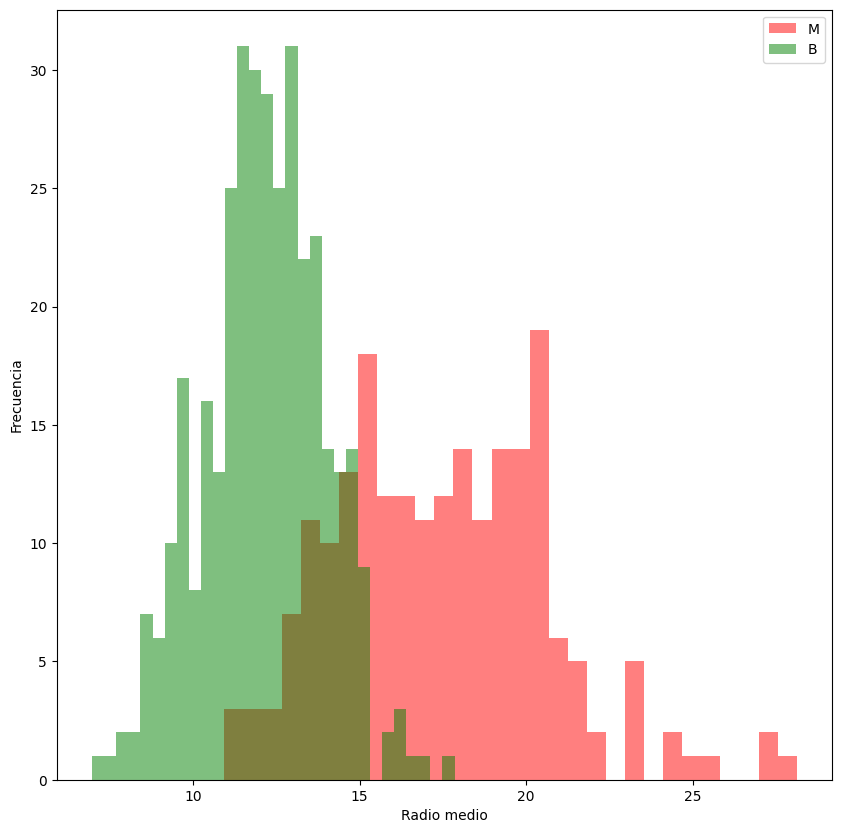

In [44]:
maligno = df[df['target'] == 0] # Clase 'Maligno'
benigno = df[df['target'] == 1] # Clase 'Benigno'
plt.figure(figsize=(10, 10))
plt.hist(maligno['radio medio'], alpha=0.5, label='M', color='red', bins=30) #alpha es la transparencia
plt.hist(benigno['radio medio'], alpha=0.5, label='B', color='green', bins=30)
plt.xlabel('Radio medio')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.show()

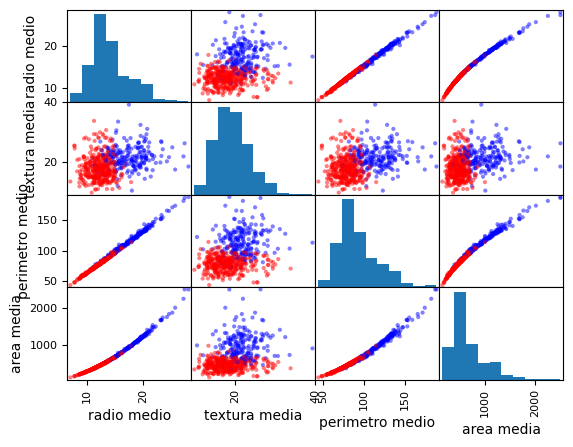

In [45]:
from pandas.plotting import scatter_matrix
scatter_matrix(df.iloc[:, :4], c=df['target'], cmap='bwr')
figuresize=(100, 100)
plt.show()

#la diagonal dibuja histogramas de frecuencia
#rango se refiere a rank, 1 para lo más probable, el último para lo menos

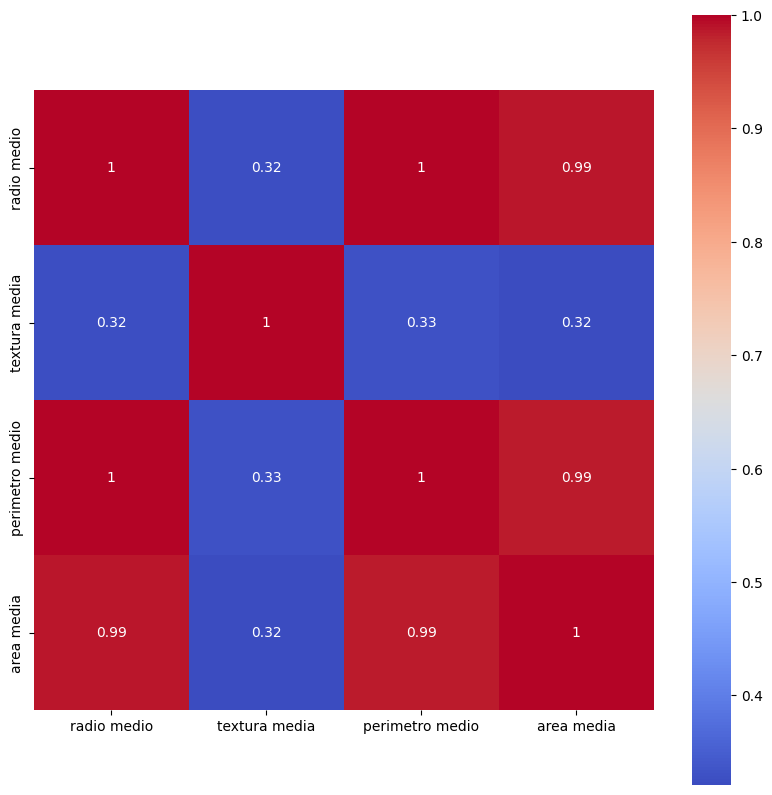

In [46]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(df.iloc[:, 0:4].corr(), annot=True, square=True, cmap='coolwarm') #.corr es la de pearson
plt.show()

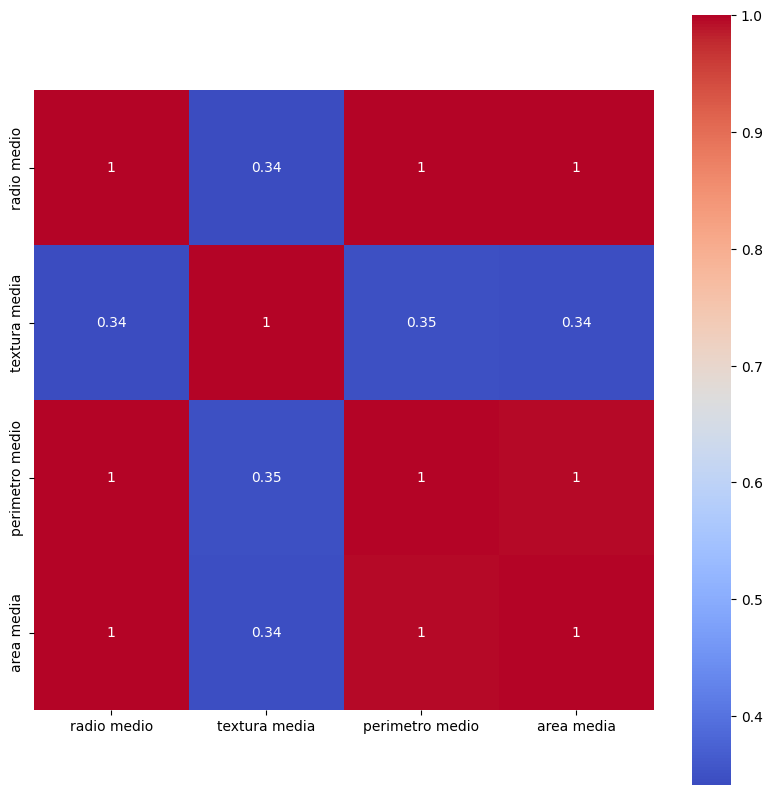

In [47]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(df.iloc[:, 0:4].corr(method='spearman'), annot=True, square=True, cmap='coolwarm')
plt.show()

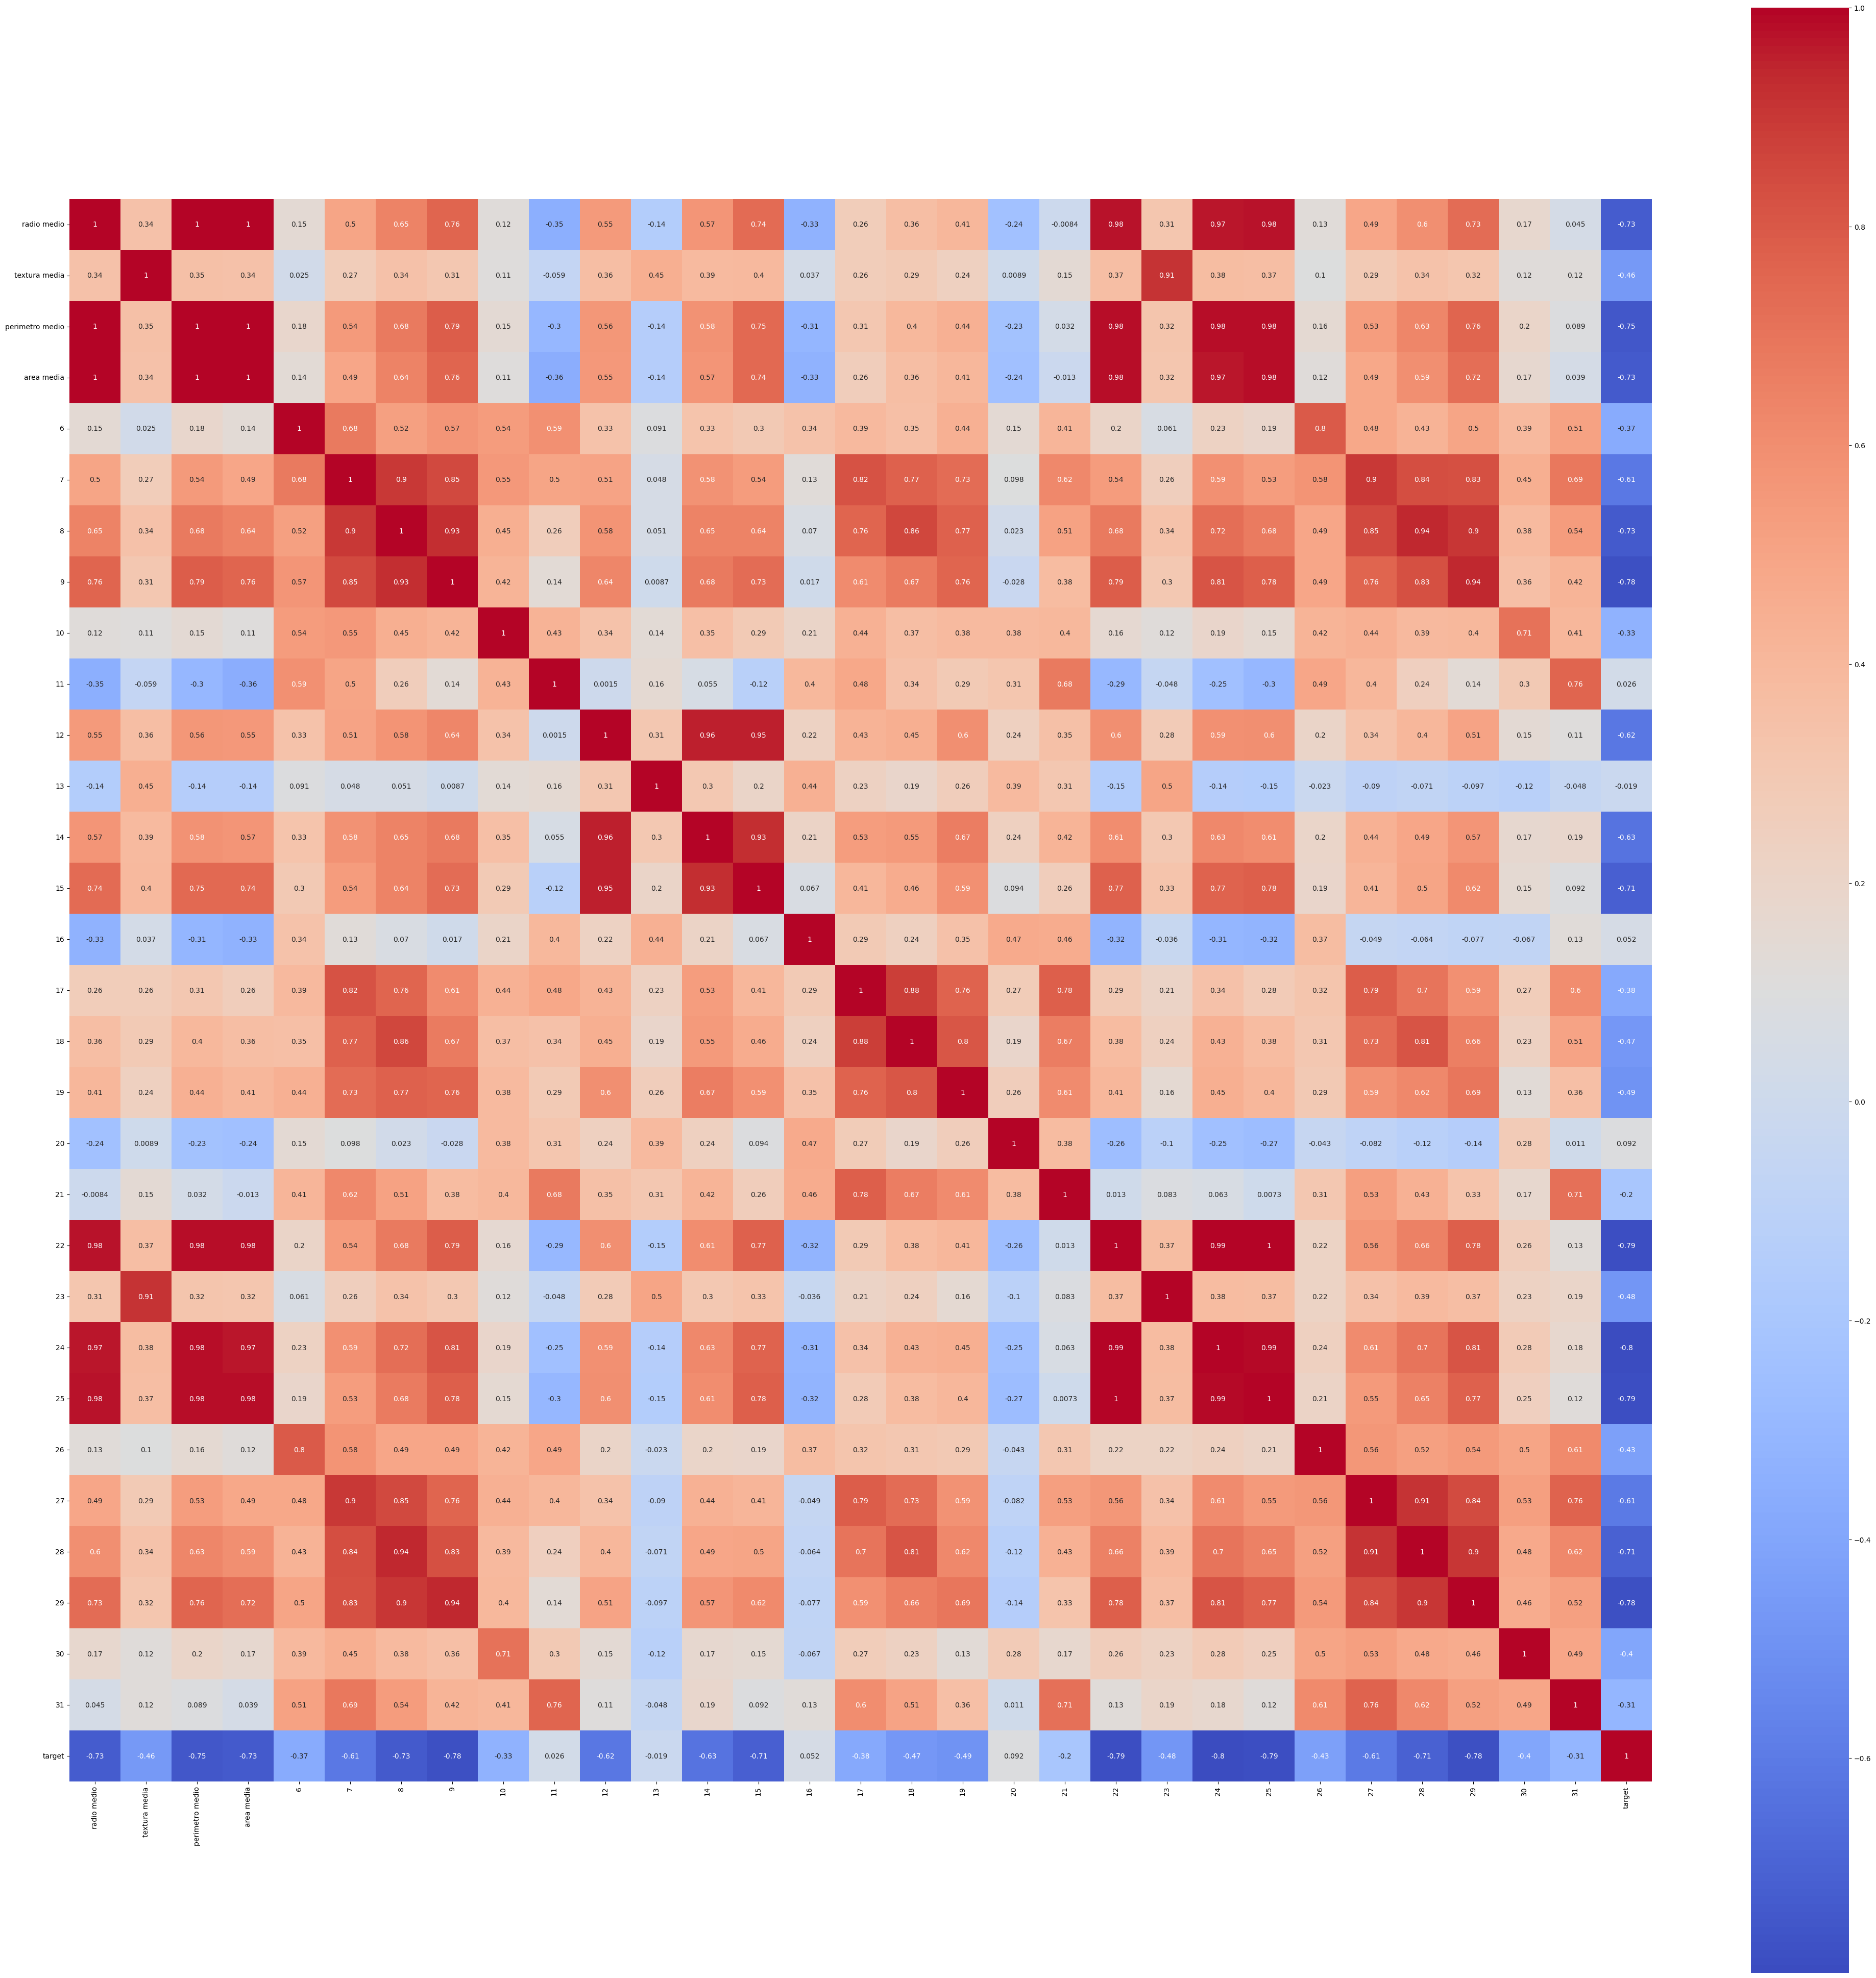

In [48]:
plt.figure(figsize=(50, 50))
sns.heatmap(df.iloc[:, 0:31].corr(method='spearman'), annot=True, square=True, cmap='coolwarm')
plt.show()

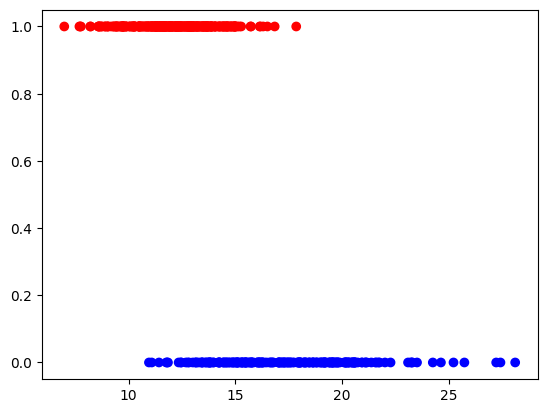

In [49]:
plt.scatter(df['radio medio'],df['target'], c=df['target'], cmap='bwr')
plt.show()

In [50]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target # 0 = Maligno, 1 = Benigno
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

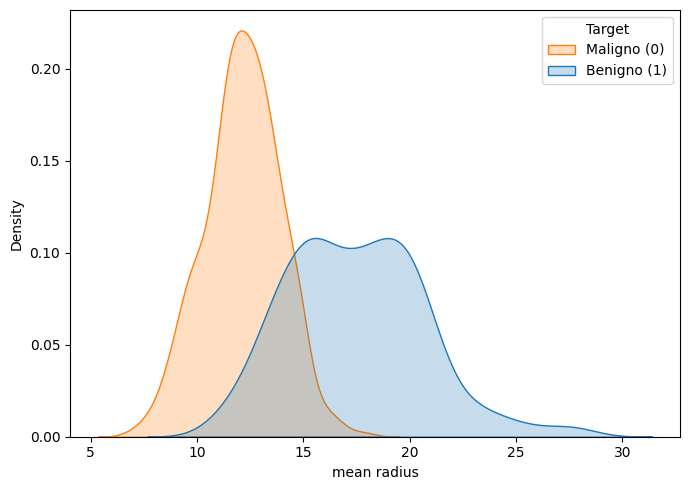

In [51]:
var = 'mean radius'
plt.figure(figsize=(7, 5))
sns.kdeplot(data=df, x=var, hue='target', fill=True, common_norm=False)
plt.xlabel(var)
plt.legend(title='Target', labels=['Maligno (0)', 'Benigno (1)'])
plt.tight_layout()
plt.show()

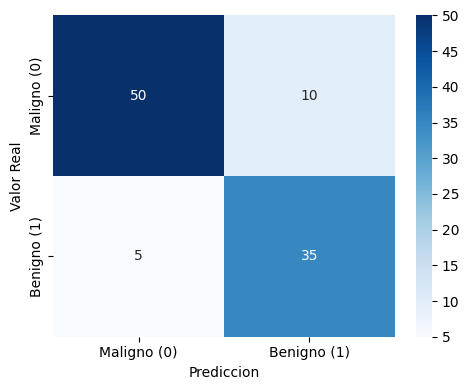

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = [[50, 10], [5, 35]] #valores arbitrarios
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
xticklabels=['Maligno (0)', 'Benigno (1)'],
yticklabels=['Maligno (0)', 'Benigno (1)'])

plt.xlabel('Prediccion')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

In [53]:
import sklearn as sk
umbral=15
prediccion=[]

for i in df['mean radius']:
  if i > umbral:
    prediccion.append(0)
  else:
    prediccion.append(1)
df['prediccion'] = prediccion
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst perimeter  worst area  worst smoothness  \
0          

In [54]:
#definimos las 4 métricas como funciones

def accuracy(tp, tn, fp, fn):
  correct = tp + tn
  total = tp + tn + fp + fn
  return correct / total

def precision(tp, fp):
  return tp / (tp + fp)

def recall(tp, fn):
  return tp / (tp + fn)

def f1_score(precision, recall):
  return 2 * (precision * recall) / (precision + recall)


#### previo a esto fueron ejercicios de clase

Ahora sí empezamos con los análisis. Seleccionamos tres variables a partir de calcular la correlación con el target

In [55]:
import numpy as np
import pandas as pd

corr_matriz = df.corr()[['target']]
correlaciones = corr_matriz.unstack()

#y ordenamos todo en orden ascendiente
corr_ord = correlaciones.sort_values(ascending=True)

# Display the complete output
pd.set_option('display.max_rows', None)
print(corr_ord)
pd.reset_option('display.max_rows')

target  worst concave points      -0.793566
        worst perimeter           -0.782914
        mean concave points       -0.776614
        worst radius              -0.776454
        mean perimeter            -0.742636
        worst area                -0.733825
        mean radius               -0.730029
        mean area                 -0.708984
        mean concavity            -0.696360
        worst concavity           -0.659610
        mean compactness          -0.596534
        worst compactness         -0.590998
        radius error              -0.567134
        perimeter error           -0.556141
        area error                -0.548236
        worst texture             -0.456903
        worst smoothness          -0.421465
        worst symmetry            -0.416294
        mean texture              -0.415185
        concave points error      -0.408042
        mean smoothness           -0.358560
        mean symmetry             -0.330499
        worst fractal dimension 

Así, las tres variables que escogemos son

1. mean fractal dimension (0.12838)
2. mean texture (-0.415185)
3. mean concave points (-0.776614

In [56]:
#ahora veamos la descripción estadística de cada variable

df['mean fractal dimension'].describe()

,mean fractal dimension
count,569.000000
mean,0.062798
std,0.007060
min,0.049960
25%,0.057700
50%,0.061540
75%,0.066120
max,0.097440


In [57]:
df['mean texture'].describe()

,mean texture
count,569.000000
mean,19.289649
std,4.301036
min,9.710000
25%,16.170000
50%,18.840000
75%,21.800000
max,39.280000


In [58]:
df['mean concave points'].describe()

,mean concave points
count,569.000000
mean,0.048919
std,0.038803
min,0.000000
25%,0.020310
50%,0.033500
75%,0.074000
max,0.201200


y graficamos el KDE para cada variable

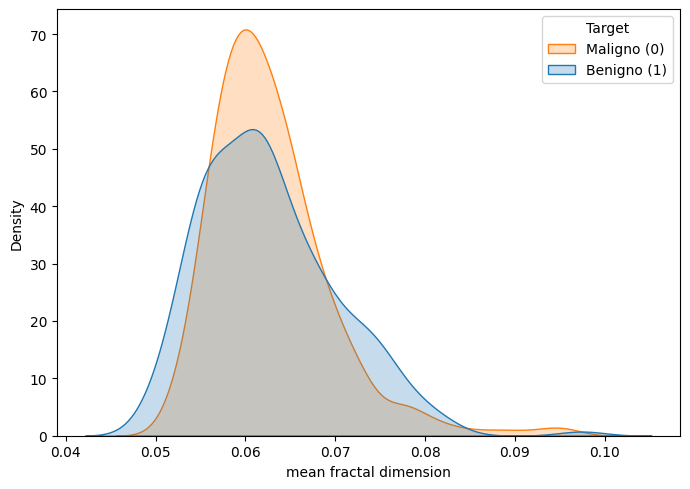

In [59]:
var1 = 'mean fractal dimension'
plt.figure(figsize=(7, 5))
sns.kdeplot(data=df, x=var1, hue='target', fill=True, common_norm=False)
plt.xlabel(var1)
plt.legend(title='Target', labels=['Maligno (0)', 'Benigno (1)'])
plt.tight_layout()
plt.show()

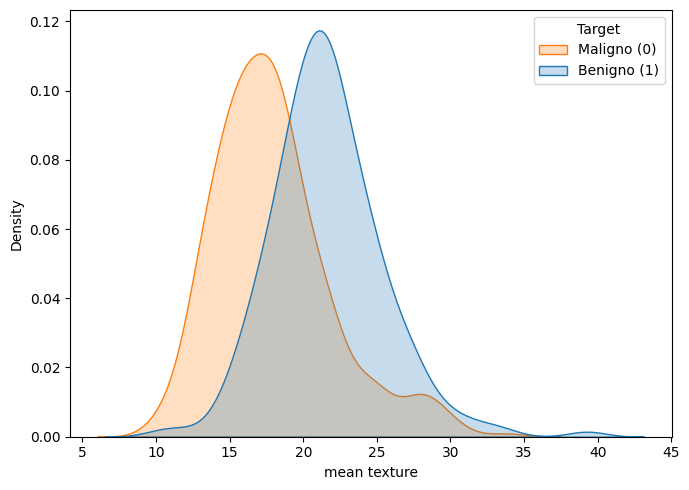

In [60]:
var2 = 'mean texture'
plt.figure(figsize=(7, 5))
sns.kdeplot(data=df, x=var2, hue='target', fill=True, common_norm=False)
plt.xlabel(var2)
plt.legend(title='Target', labels=['Maligno (0)', 'Benigno (1)'])
plt.tight_layout()
plt.show()

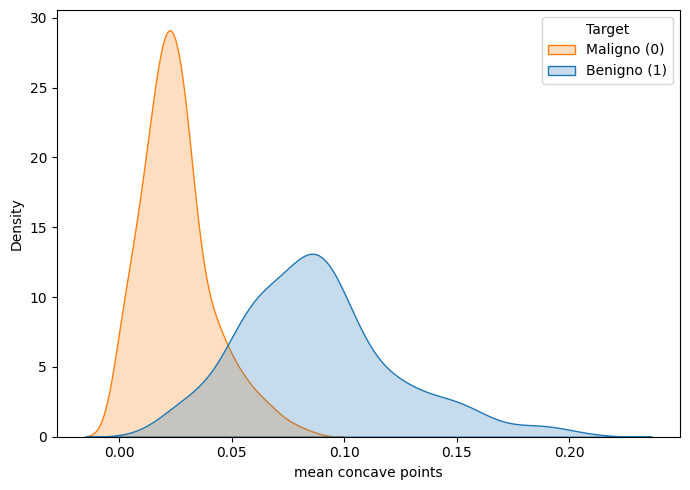

In [61]:
var3 = 'mean concave points'
plt.figure(figsize=(7, 5))
sns.kdeplot(data=df, x=var3, hue='target', fill=True, common_norm=False)
plt.xlabel(var3)
plt.legend(title='Target', labels=['Maligno (0)', 'Benigno (1)'])
plt.tight_layout()
plt.show()

Y vemos que es gradualmente más fácil establecer un umbral

In [62]:

#guardamos los 3 umbrales en variables
umbral1=0.61
umbral2=19
umbral3=0.048

#y las correlaciones
corr1=0.12838
corr2=-0.415185
corr3=-0.776614

In [69]:
variables = ['mean fractal dimension', 'mean texture', 'mean concave points']

def asignar_prediccion(corr, umbral, variable, df):
  prediccion = []
  if corr < 0:
    for index, row in df.iterrows():
       if row[variable] < umbral:
          prediccion.append(1)
       else:
          prediccion.append(0)
  if corr > 0:
    for index, row in df.iterrows():
       if row[variable] > umbral:
          prediccion.append(1)
       else:
          prediccion.append(0)
  return prediccion

#creamos un dataframe nuevo para guardar las predicciones SEGÚN cada variable y compararlas con el target real
pred_vs_real= pd.DataFrame()
pred_vs_real['real_target'] = df['target']

pred_vs_real['pred_mean fractal dimension'] = asignar_prediccion(corr1, umbral1, variables[0], df)
pred_vs_real['pred_mean texture'] = asignar_prediccion(corr2, umbral2, variables[1], df)
pred_vs_real['pred_mean concave points'] = asignar_prediccion(corr3, umbral3, variables[2], df)

display(pred_vs_real.head())
#aunque noto que para MFD todas son cero. Es cierto que es la variable que menor correlación tiene, pero
#es extraño que todas las predicciónes dean malignas

,real_target,pred_mean fractal dimension,pred_mean texture,pred_mean concave points
0,0,0,1,0
1,0,0,1,0
2,0,0,0,0
3,0,0,0,0
4,0,0,1,0


Ahora imprimiremos las primeras 30 filas de este nuevo dataframe

In [70]:
display(pred_vs_real.head(30))

,real_target,pred_mean fractal dimension,pred_mean texture,pred_mean concave points
0,0,0,1,0
1,0,0,1,0
2,0,0,0,0
3,0,0,0,0
4,0,0,1,0
5,0,0,1,0
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,0,0,0,0


Vemos que hay algunas predicciones que no coincide, en particular, hay algunas donde el target real es 0 (tumor maligno) y la predicción es 1. Esto es porque se encuentran en una zona poco clara del umbral:
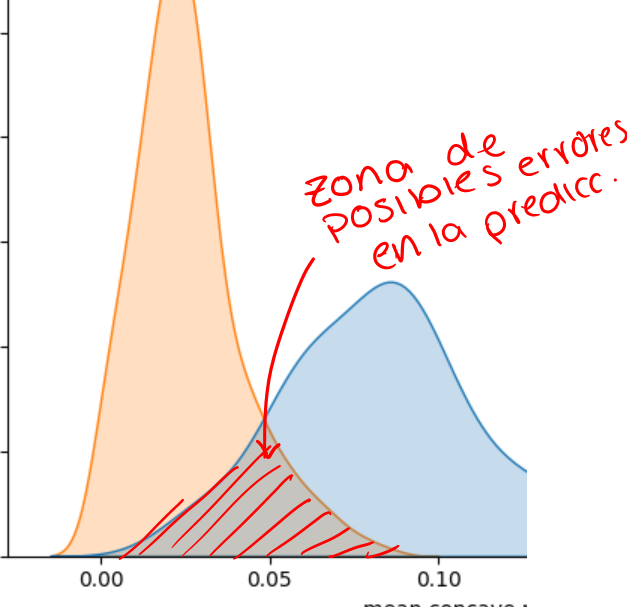




Así todo lo que está a la izquierda del umbral es interpretado como un caso maligno (0) y lo que está a la derecha como un caso beningno (1). Por lo que los casos malignos que están en la zona de traslape después del umbral, serán los false negative, los casos más peligrosos.

In [72]:
#ahora calculamos todos los aciertos para cada variable

def asignar_pos_neg(df, variable):
  true_positives = 0
  true_negatives = 0
  false_positives = 0
  false_negatives = 0

  for index, row in df.iterrows():
      if row['real_target'] == 1 and row[variable] == 1:
          true_negatives += 1
      elif row['real_target'] == 0 and row[variable] == 1:
          false_negatives += 1
      elif row['real_target'] == 1 and row[variable] == 0:
          false_positives += 1
      elif row['real_target'] == 0 and row[variable] == 0:
          true_positives += 1

  resultados_variable=[true_positives, true_negatives, false_positives, false_negatives]
  return resultados_variable

resultados_meanfractaldimension= asignar_pos_neg(pred_vs_real, 'pred_mean fractal dimension')
resultados_meantexture= asignar_pos_neg(pred_vs_real, 'pred_mean texture')
resultados_meanconcavepoints= asignar_pos_neg(pred_vs_real, 'pred_mean concave points')

print("MEAN FRACTAL DIMENSION")
print("True positives: ", resultados_meanfractaldimension[0])
print("True negatives: ", resultados_meanfractaldimension[1])
print("False positives: ", resultados_meanfractaldimension[2])
print("False negatives: ", resultados_meanfractaldimension[3])

print("MEAN TEXTURE")
print("True positives: ", resultados_meantexture[0])
print("True negatives: ", resultados_meantexture[1])
print("False positives: ", resultados_meantexture[2])
print("False negatives: ", resultados_meantexture[3])

print("MEAN CONCAVE POINTS")
print("True positives: ", resultados_meanconcavepoints[0])
print("True negatives: ", resultados_meanconcavepoints[1])
print("False positives: ", resultados_meanconcavepoints[2])
print("False negatives: ", resultados_meanconcavepoints[3])

MEAN FRACTAL DIMENSION
True positives:  212
True negatives:  0
False positives:  357
False negatives:  0
MEAN TEXTURE
True positives:  163
True negatives:  245
False positives:  112
False negatives:  49
MEAN CONCAVE POINTS
True positives:  194
True negatives:  321
False positives:  36
False negatives:  18


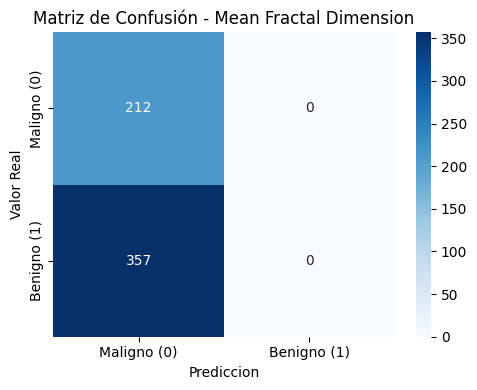

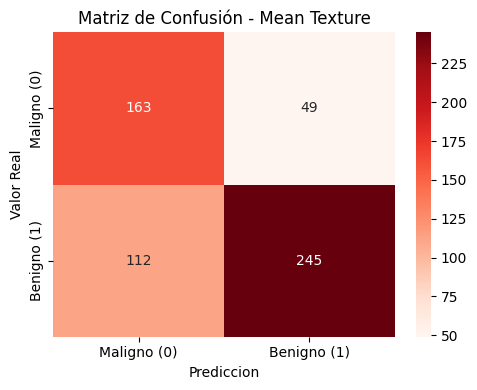

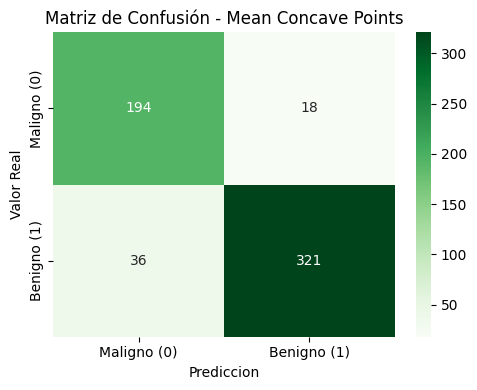

In [75]:
#ahora creamos la matriz de confusión para cada variable

#MEAN FRACTAL DIMENSION
matriz_confusion_MFD= [[resultados_meanfractaldimension[0], resultados_meanfractaldimension[3]],
 [resultados_meanfractaldimension[2], resultados_meanfractaldimension[1]]]
plt.figure(figsize=(5, 4))
sns.heatmap(matriz_confusion_MFD, annot=True, fmt='d', cmap='Blues',
xticklabels=['Maligno (0)', 'Benigno (1)'],
yticklabels=['Maligno (0)', 'Benigno (1)'])

plt.xlabel('Prediccion')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Mean Fractal Dimension')
plt.tight_layout()
plt.show()

#MEAN TEXTURE
matriz_confusion_TEX= [[resultados_meantexture[0], resultados_meantexture[3]],
 [resultados_meantexture[2], resultados_meantexture[1]]]
plt.figure(figsize=(5, 4))
sns.heatmap(matriz_confusion_TEX, annot=True, fmt='d', cmap='Reds',
xticklabels=['Maligno (0)', 'Benigno (1)'],
yticklabels=['Maligno (0)', 'Benigno (1)'])

plt.xlabel('Prediccion')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Mean Texture')
plt.tight_layout()
plt.show()

#MEAN CONCAVE POINTS
matriz_confusion_MCP= [[resultados_meanconcavepoints[0], resultados_meanconcavepoints[3]],
 [resultados_meanconcavepoints[2], resultados_meanconcavepoints[1]]]
plt.figure(figsize=(5, 4))
sns.heatmap(matriz_confusion_MCP, annot=True, fmt='d', cmap='Greens',
xticklabels=['Maligno (0)', 'Benigno (1)'],
yticklabels=['Maligno (0)', 'Benigno (1)'])

plt.xlabel('Prediccion')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Mean Concave Points')
plt.tight_layout()
plt.show()

In [77]:
#y ahora evaluamos las 4 métricas que definimos ants

#  resultados_variable=[true_positives, true_negatives, false_positives, false_negatives]

print("MEAN FRACTAL DIMENSION")
print("Accuracy: ", accuracy(resultados_meanfractaldimension[0], resultados_meanfractaldimension[1],
                            resultados_meanfractaldimension[2],resultados_meanfractaldimension[3]))
precisionMFD=precision(resultados_meanfractaldimension[0],resultados_meanfractaldimension[2])
print("Precision: ", precisionMFD)
recallMFD=recall(resultados_meanfractaldimension[0],resultados_meanfractaldimension[3])
print("Recall: ", recallMFD)
print("F1 Score: ", f1_score(precisionMFD, recallMFD))

print("\nMEAN TEXTURE")
print("Accuracy: ", accuracy(resultados_meantexture[0], resultados_meantexture[1],
                            resultados_meantexture[2],resultados_meantexture[3]))
precisionTEX=precision(resultados_meantexture[0],resultados_meantexture[2])
print("Precision: ", precisionTEX)
recallTEX=recall(resultados_meantexture[0],resultados_meantexture[3])
print("Recall: ", recallTEX)
print("F1 Score: ", f1_score(precisionTEX, recallTEX))

print("\nMEAN CONCAVE POINTS")
print("Accuracy: ", accuracy(resultados_meanconcavepoints[0], resultados_meanconcavepoints[1],
                            resultados_meanconcavepoints[2],resultados_meanconcavepoints[3]))
precisionMCP=precision(resultados_meanconcavepoints[0],resultados_meanconcavepoints[2])
print("Precision: ", precisionMCP)
recallMCP=recall(resultados_meanconcavepoints[0],resultados_meanconcavepoints[3])
print("Recall: ", recallMCP)
print("F1 Score: ", f1_score(precisionMCP, recallMCP))

MEAN FRACTAL DIMENSION
Accuracy:  0.37258347978910367
Precision:  0.37258347978910367
Recall:  1.0
F1 Score:  0.5428937259923176

MEAN TEXTURE
Accuracy:  0.7170474516695958
Precision:  0.5927272727272728
Recall:  0.7688679245283019
F1 Score:  0.6694045174537988

MEAN CONCAVE POINTS
Accuracy:  0.9050966608084359
Precision:  0.8434782608695652
Recall:  0.9150943396226415
F1 Score:  0.8778280542986426


De estos últimos resultados, vemos que claramente tomar una variable como mean fractal dimension nos va a generar muchos errores en la predicción, pues predijo todos los casos como malignos. Por otro lado, tomar una variable con correlación alta, como mean concave points nos da métricas altas en todas ellas, por lo que podemos inferir que es una muy buena variable para usar como predicción. Además, vimos que el umbral para esta última variable es confiable, con un 90% de accuracy y un 84% de precision. Sin embargo, en la vida real esto no sería suficiente

In [79]:
#ahora variaremos el umbral para cada una de las tres variables, a través de todo el intervalo de la zona
#de traslape (a ojo)

umbral_variable_MFD=np.linspace(0.05,0.09,10) #diez umbrales diferentes
prediccionesMFD=[]

umbral_variable_TEX=np.linspace(10,35,10)
prediccionesTEX=[]

umbral_variable_MCP=np.linspace(0.01,0.09,10)
prediccionesMCP=[]

for k in umbral_variable_MFD:
  prediccionesMFD.append([asignar_prediccion(corr1,k,variables[0],df), k])

for k in umbral_variable_TEX:
  prediccionesTEX.append([asignar_prediccion(corr2,k,variables[1],df), k])

for k in umbral_variable_MCP:
  prediccionesMCP.append([asignar_prediccion(corr3,k,variables[2],df), k])



In [80]:
#ahora variaremos el umbral para cada una de las tres variables, a través de todo el intervalo de la zona
#de traslape (a ojo)

umbral_variable_MFD=np.linspace(0.05,0.09,10) #diez umbrales diferentes
prediccionesMFD_df = pd.DataFrame()
prediccionesMFD_df['real_target'] = df['target']


umbral_variable_TEX=np.linspace(10,35,10)
prediccionesTEX_df = pd.DataFrame()
prediccionesTEX_df['real_target'] = df['target']

umbral_variable_MCP=np.linspace(0.01,0.09,10)
prediccionesMCP_df = pd.DataFrame()
prediccionesMCP_df['real_target'] = df['target']


for i, umbral in enumerate(umbral_variable_MFD):
  prediccionesMFD_df[f'prediccion_umbral_{i+1}'] = asignar_prediccion(corr1, umbral, variables[0], df)

for i, umbral in enumerate(umbral_variable_TEX):
  prediccionesTEX_df[f'prediccion_umbral_{i+1}'] = asignar_prediccion(corr2, umbral, variables[1], df)

for i, umbral in enumerate(umbral_variable_MCP):
  prediccionesMCP_df[f'prediccion_umbral_{i+1}'] = asignar_prediccion(corr3, umbral, variables[2], df)

print("Predicciones para Mean Fractal Dimension:")
display(prediccionesMFD_df.head())

print("\nPredicciones para Mean Texture:")
display(prediccionesTEX_df.head())

print("\nPredicciones para Mean Concave Points:")
display(prediccionesMCP_df.head())

Predicciones para Mean Fractal Dimension:


,real_target,prediccion_umbral_1,prediccion_umbral_2,prediccion_umbral_3,prediccion_umbral_4,prediccion_umbral_5,prediccion_umbral_6,prediccion_umbral_7,prediccion_umbral_8,prediccion_umbral_9,prediccion_umbral_10
0,0,1,1,1,1,1,1,1,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0
2,0,1,1,1,0,0,0,0,0,0,0
3,0,1,1,1,1,1,1,1,1,1,1
4,0,1,1,0,0,0,0,0,0,0,0



Predicciones para Mean Texture:


,real_target,prediccion_umbral_1,prediccion_umbral_2,prediccion_umbral_3,prediccion_umbral_4,prediccion_umbral_5,prediccion_umbral_6,prediccion_umbral_7,prediccion_umbral_8,prediccion_umbral_9,prediccion_umbral_10
0,0,0,1,1,1,1,1,1,1,1,1
1,0,0,0,0,1,1,1,1,1,1,1
2,0,0,0,0,0,0,1,1,1,1,1
3,0,0,0,0,0,1,1,1,1,1,1
4,0,0,0,1,1,1,1,1,1,1,1



Predicciones para Mean Concave Points:


,real_target,prediccion_umbral_1,prediccion_umbral_2,prediccion_umbral_3,prediccion_umbral_4,prediccion_umbral_5,prediccion_umbral_6,prediccion_umbral_7,prediccion_umbral_8,prediccion_umbral_9,prediccion_umbral_10
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,1,1
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


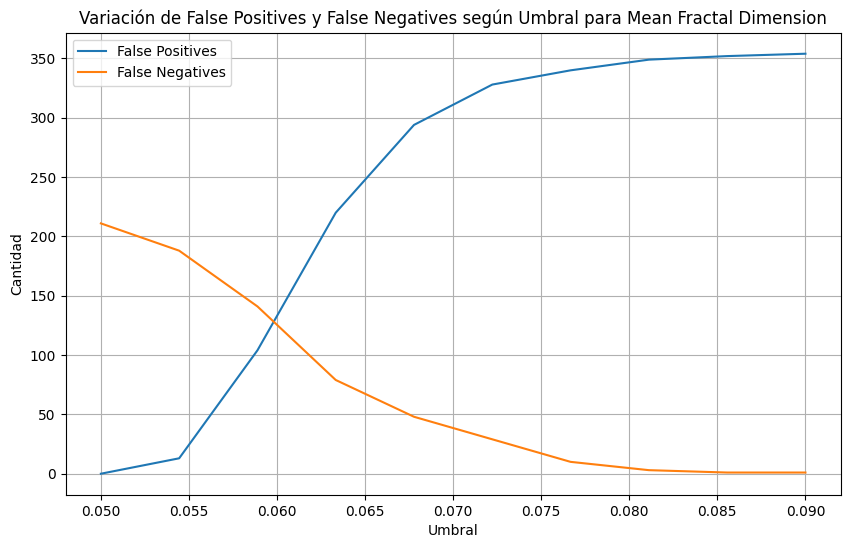

In [84]:
#ahora buscaremos los FP y FN para cada umbral, para cada variable

#MEAN FRACTAL DIMENSION
#queremos un array tal que FP_MFD=[[numero de FP, umbral1],[FP2,umbral 2]]

FP_MFD=[]
FN_MFD=[]

for umbral in umbral_variable_MFD:
  FP_MFD.append([asignar_pos_neg(prediccionesMFD_df, f'prediccion_umbral_{umbral_variable_MFD.tolist().index(umbral)+1}')[2], umbral])
  FN_MFD.append([asignar_pos_neg(prediccionesMFD_df, f'prediccion_umbral_{umbral_variable_MFD.tolist().index(umbral)+1}')[3], umbral])

#aquí tuve que poner explícitamente quien era el punto x y y porque los definí al revés :P
fp_mfd_x = [point[1] for point in FP_MFD]
fp_mfd_y = [point[0] for point in FP_MFD]
fn_mfd_x = [point[1] for point in FN_MFD]
fn_mfd_y = [point[0] for point in FN_MFD]


#y graficamos como varían los false positive y false negative según cada umbral

plt.figure(figsize=(10, 6))
plt.plot(fp_mfd_x, fp_mfd_y, label='False Positives')
plt.plot(fn_mfd_x, fn_mfd_y, label='False Negatives')
plt.xlabel('Umbral')
plt.ylabel('Cantidad')
plt.title('Variación de False Positives y False Negatives según Umbral para Mean Fractal Dimension')
plt.legend()
plt.grid(True)
plt.show()

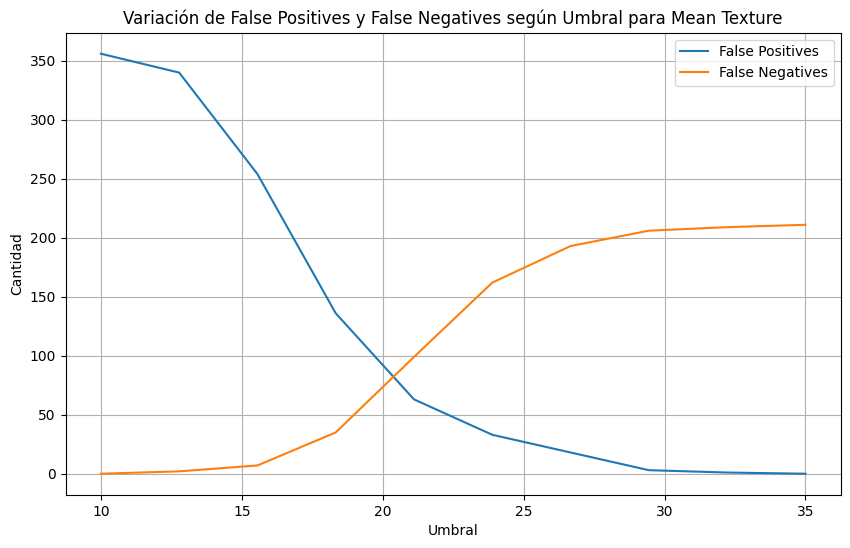

In [85]:
# y hacemos lo mismo para las otras variables

#MEAN TEXTURE

FP_TEX=[]
FN_TEX=[]

for umbral in umbral_variable_TEX:
  FP_TEX.append([asignar_pos_neg(prediccionesTEX_df, f'prediccion_umbral_{umbral_variable_TEX.tolist().index(umbral)+1}')[2], umbral])
  FN_TEX.append([asignar_pos_neg(prediccionesTEX_df, f'prediccion_umbral_{umbral_variable_TEX.tolist().index(umbral)+1}')[3], umbral])

#aquí tuve que poner explícitamente quien era el punto x y y porque los definí al revés :P
fp_tex_x = [point[1] for point in FP_TEX]
fp_tex_y = [point[0] for point in FP_TEX]
fn_tex_x = [point[1] for point in FN_TEX]
fn_tex_y = [point[0] for point in FN_TEX]


#y graficamos como varían los false positive y false negative según cada umbral

plt.figure(figsize=(10, 6))
plt.plot(fp_tex_x, fp_tex_y, label='False Positives')
plt.plot(fn_tex_x, fn_tex_y, label='False Negatives')
plt.xlabel('Umbral')
plt.ylabel('Cantidad')
plt.title('Variación de False Positives y False Negatives según Umbral para Mean Texture')
plt.legend()
plt.grid(True)
plt.show()

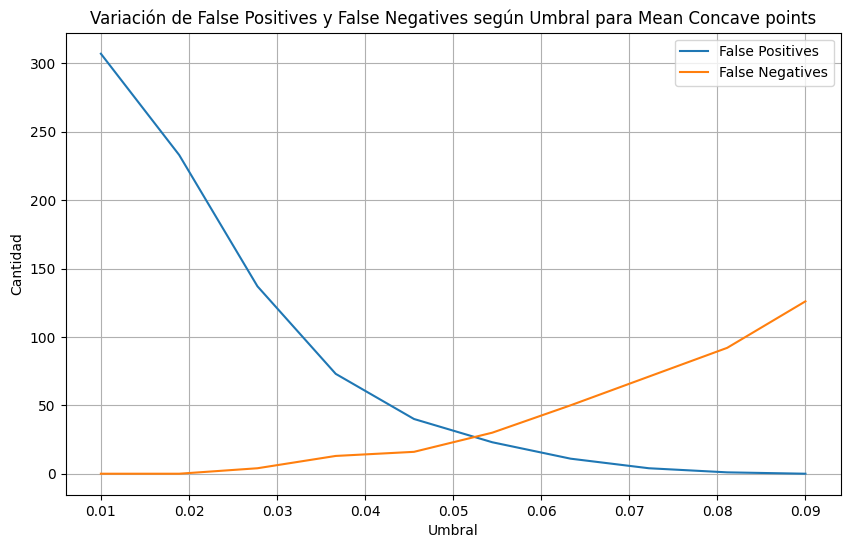

In [86]:
#MEAN CONCAVE POINTS

FP_MCP=[]
FN_MCP=[]

for umbral in umbral_variable_MCP:
  FP_MCP.append([asignar_pos_neg(prediccionesMCP_df, f'prediccion_umbral_{umbral_variable_MCP.tolist().index(umbral)+1}')[2], umbral])
  FN_MCP.append([asignar_pos_neg(prediccionesMCP_df, f'prediccion_umbral_{umbral_variable_MCP.tolist().index(umbral)+1}')[3], umbral])

#aquí tuve que poner explícitamente quien era el punto x y y porque los definí al revés :P
fp_mcp_x = [point[1] for point in FP_MCP]
fp_mcp_y = [point[0] for point in FP_MCP]
fn_mcp_x = [point[1] for point in FN_MCP]
fn_mcp_y = [point[0] for point in FN_MCP]


#y graficamos como varían los false positive y false negative según cada umbral

plt.figure(figsize=(10, 6))
plt.plot(fp_mcp_x, fp_mcp_y, label='False Positives')
plt.plot(fn_mcp_x, fn_mcp_y, label='False Negatives')
plt.xlabel('Umbral')
plt.ylabel('Cantidad')
plt.title('Variación de False Positives y False Negatives según Umbral para Mean Concave points')
plt.legend()
plt.grid(True)
plt.show()

Nos concentraremos en esta gráfica para analizar lo que vemos, ya que el análisis es análogo para las tres. Esta última es nuestra mejor variable para predecir.

Ahora, para un resultado equilibrado, el punto donde se cruzan las líneas es el mejor para escoger el umbral, es decir, para el último caso, alrededor de 0.052. Sin embargo! Si la prioridad es reducir los falsos negativos, aunque sea a costa de aumentar los falsos positivos, se podría reducir el umbral a 0.04 0 0.03. En ellos, los falsos negativos son casi cero, pero los falsos positivos aumentan varias veces.

Así, que si yo tuviera que tomar la decisión, yo escogería el umbral 0.05 para este caso en particular, pues es el que más reduce los FN y aumenta menos los FP